In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
import random
from utils import plot_samples_with_labels, classify, plot_conf_matrix

In [2]:
# Set the seed for reproducibility
random.seed(42)

### Load and explore data

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
# Download the MNIST dataset (handwritten digit images with labels)
mnist = keras.datasets.mnist
(training_images, training_labels), (X_temp, y_temp) = mnist.load_data()

validation_images, test_images, validation_labels, test_labels= train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)



In [5]:
print(len(test_images))

5000


In [6]:
mnist.load_data?


Signature: mnist.load_data(path='mnist.npz')
Docstring:
Loads the MNIST dataset.

This is a dataset of 60,000 28x28 grayscale images of the 10 digits,
along with a test set of 10,000 images.
More info can be found at the
[MNIST homepage](http://yann.lecun.com/exdb/mnist/).

Args:
    path: path where to cache the dataset locally
        (relative to `~/.keras/datasets`).

Returns:
    Tuple of NumPy arrays: `(x_train, y_train), (x_test, y_test)`.

**`x_train`**: `uint8` NumPy array of grayscale image data with shapes
  `(60000, 28, 28)`, containing the training data. Pixel values range
  from 0 to 255.

**`y_train`**: `uint8` NumPy array of digit labels (integers in range 0-9)
  with shape `(60000,)` for the training data.

**`x_test`**: `uint8` NumPy array of grayscale image data with shapes
  `(10000, 28, 28)`, containing the test data. Pixel values range
  from 0 to 255.

**`y_test`**: `uint8` NumPy array of digit labels (integers in range 0-9)
  with shape `(10000,)` for the test d

In [7]:
print(training_labels)

[5 0 4 ... 5 6 8]


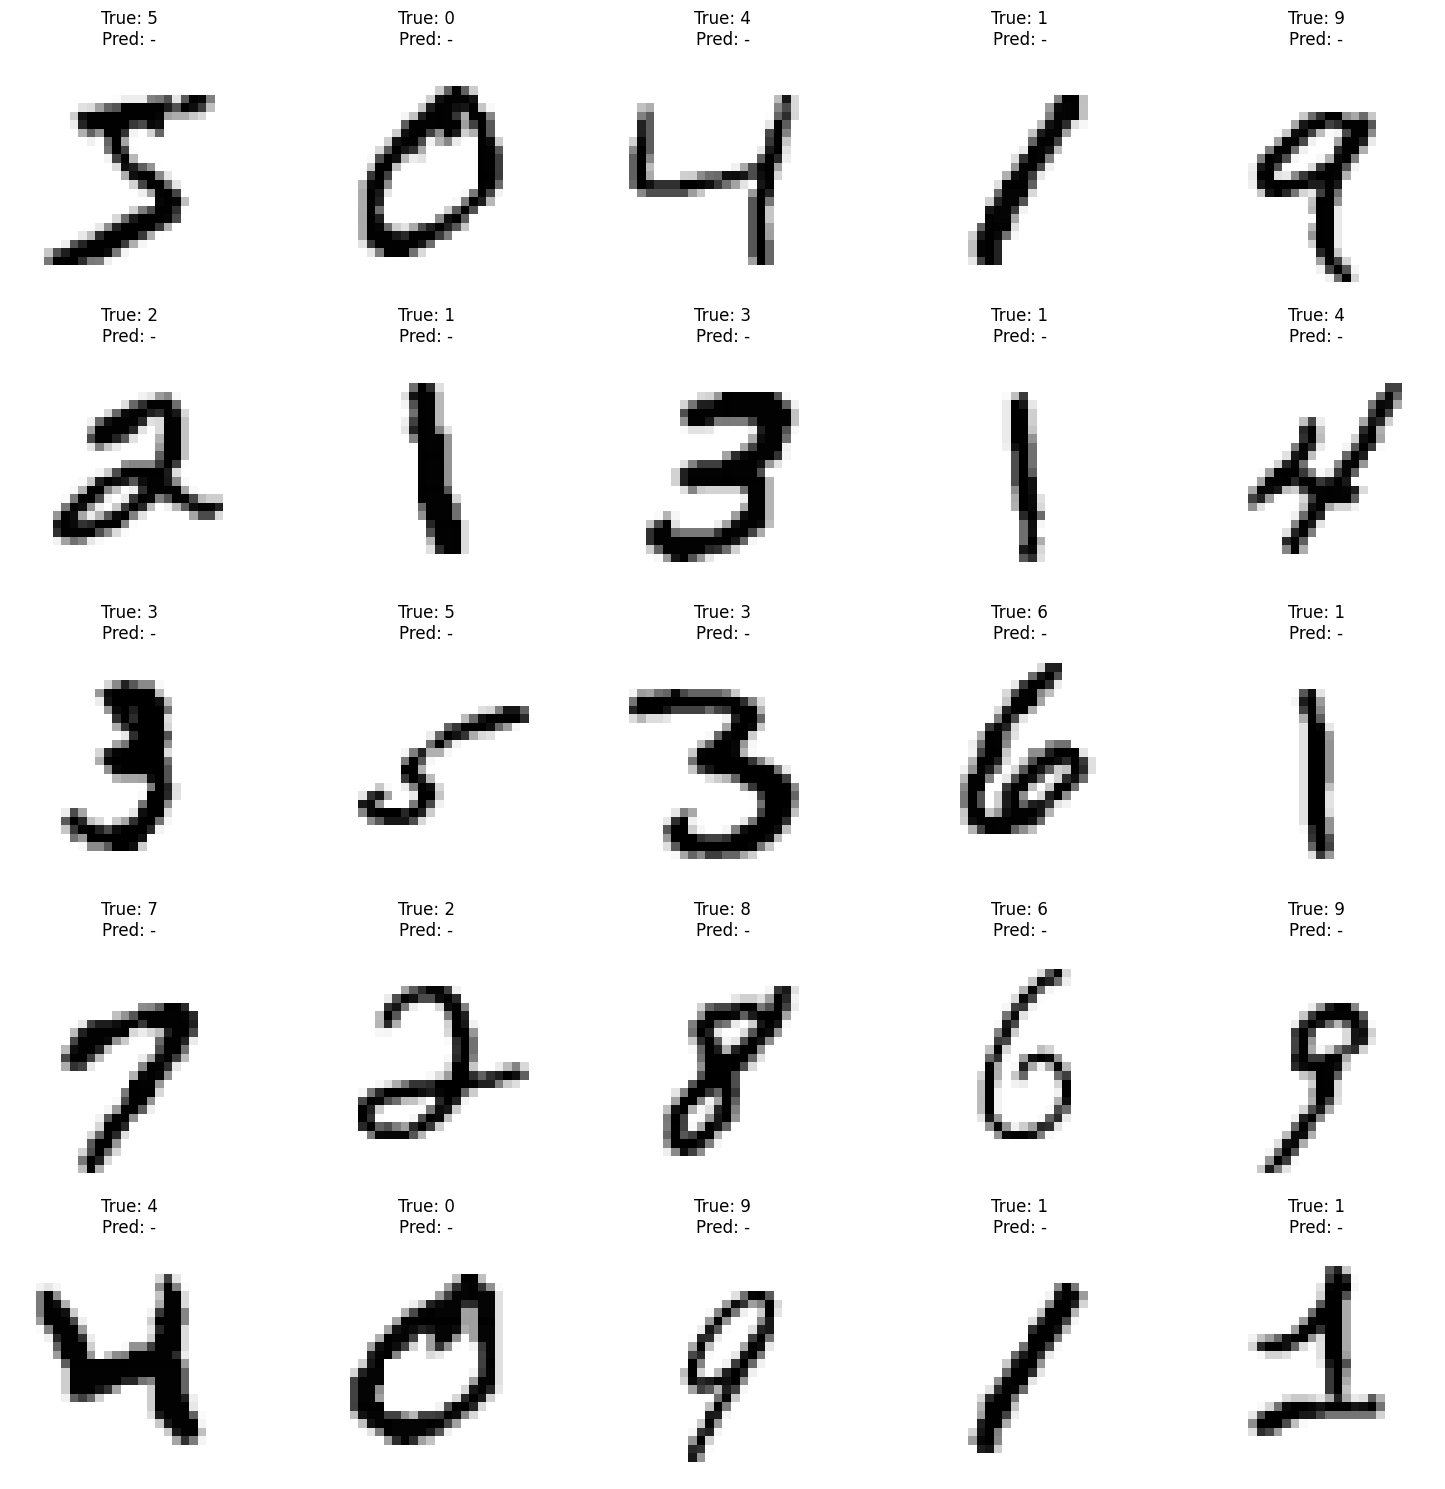

In [8]:
plot_samples_with_labels(training_images, training_labels, num_samples = 25, cmap = plt.cm.binary, randomize= False)

#### Data preparation

In [9]:
training_images.shape

(60000, 28, 28)

In [10]:
training_images = training_images / 255.0
validation_images = validation_images / 255.0
test_images = test_images / 255.0

# Reshape the data to include a channel dimension
training_images = training_images.reshape(training_images.shape[0], 28, 28, 1)
validation_images = validation_images.reshape(validation_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

### Build the model

In [11]:
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential

model = Sequential([
    Flatten(input_shape=(28, 28, 1)),  # 1 = grayscale
    Dense(units=64, activation='relu', input_shape=(28, 28, 1)),
    Dropout(0.1),
    Dense(units=128, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])
model.summary()

c:\Users\Paula\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\Paula\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 59,850 (233.79 KB)

 Trainable params: 59,850 (233.79 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.001)

In [13]:
model.compile(optimizer=optimizer, 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

### Train the model

In [14]:
BATCH_SIZE = 32
num_training_images = training_images.shape[0]

history = model.fit(
    training_images, training_labels,
    epochs=10,
    batch_size=BATCH_SIZE,
    validation_data=(validation_images, validation_labels)
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8090 - loss: 0.6231 - val_accuracy: 0.9540 - val_loss: 0.1524
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9378 - loss: 0.2055 - val_accuracy: 0.9592 - val_loss: 0.1204
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9514 - loss: 0.1613 - val_accuracy: 0.9660 - val_loss: 0.1062
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9586 - loss: 0.1356 - val_accuracy: 0.9712 - val_loss: 0.0938
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9605 - loss: 0.1297 - val_accuracy: 0.9750 - val_loss: 0.0867
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9634 - loss: 0.1186 - val_accuracy: 0.9714 - val_loss: 0.0990
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9654 - loss: 0.1094 - val_accuracy: 0.9732 - val_loss: 0.0846
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9682 - loss: 0.1005 - 

In [15]:
model.save('models/digit_non_CNN.h5')

### Using the model to classify new images

In [16]:
from tensorflow.keras.models import load_model

model_non_cnn = load_model('models/digit_non_CNN.h5')

In [17]:
def classify(test_images, model):
    """
    Predicts the class labels for a batch of test images using a trained model.

    Args:
        test_images (numpy.ndarray): Preprocessed test images ready for prediction.
        model (tensorflow.keras.Model): A trained model to classify the images.

    Returns:
        numpy.ndarray: An array of predicted class labels.
    """
    predictions = model.predict(test_images)    # Predict probabilities
    print(predictions)
    predicted_class = np.argmax(predictions, axis=-1)    # Get class with highest probability
    return predicted_class


In [18]:
predicted_labels = classify(test_images, model_non_cnn)
predicted_labels = np.array(predicted_labels)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[1.3090146e-08 4.7208997e-11 2.6695952e-08 ... 7.5600842e-10
  5.5947416e-09 3.9890651e-09]
 [2.8292087e-08 6.7000551e-06 9.9898976e-01 ... 1.4650401e-04
  2.3861391e-04 1.2852303e-09]
 [1.8845552e-18 9.5889761e-11 6.3577831e-11 ... 1.5728295e-12
  1.0404896e-08 8.1282366e-08]
 ...
 [9.7989861e-05 1.7901490e-04 9.7225129e-06 ... 3.8089850e-06
  9.8731869e-01 2.6993011e-03]
 [2.5630865e-07 2.2417335e-09 9.4806586e-07 ... 1.3518146e-04
  1.3606784e-06 9.9984097e-01]
 [9.9998319e-01 4.4974285e-12 7.9722522e-06 ... 3.5734602e-09
  3.3547163e-08 2.0257515e-07]]


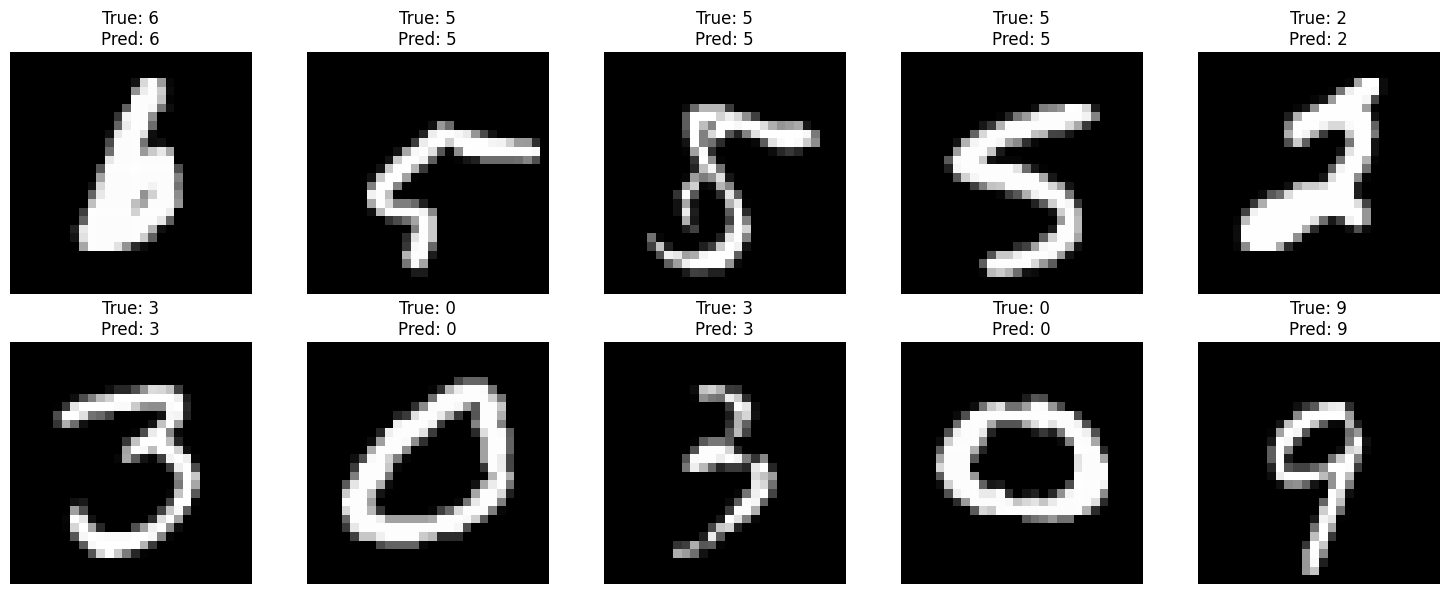

In [19]:
plot_samples_with_labels(test_images, test_labels, predicted_labels, num_samples = 10, randomize= True)

In [20]:
from sklearn.metrics import classification_report, accuracy_score

# Calculate metrics
print("Accuracy:", accuracy_score(test_labels, predicted_labels))
print("\nClassification Report:\n")
print(classification_report(test_labels, predicted_labels))

Accuracy: 0.973

Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       494
           1       0.99      0.99      0.99       561
           2       0.97      0.97      0.97       524
           3       0.98      0.97      0.98       523
           4       0.98      0.95      0.97       501
           5       0.96      0.98      0.97       415
           6       0.96      0.98      0.97       494
           7       0.97      0.97      0.97       496
           8       0.97      0.96      0.97       480
           9       0.96      0.96      0.96       512

    accuracy                           0.97      5000
   macro avg       0.97      0.97      0.97      5000
weighted avg       0.97      0.97      0.97      5000



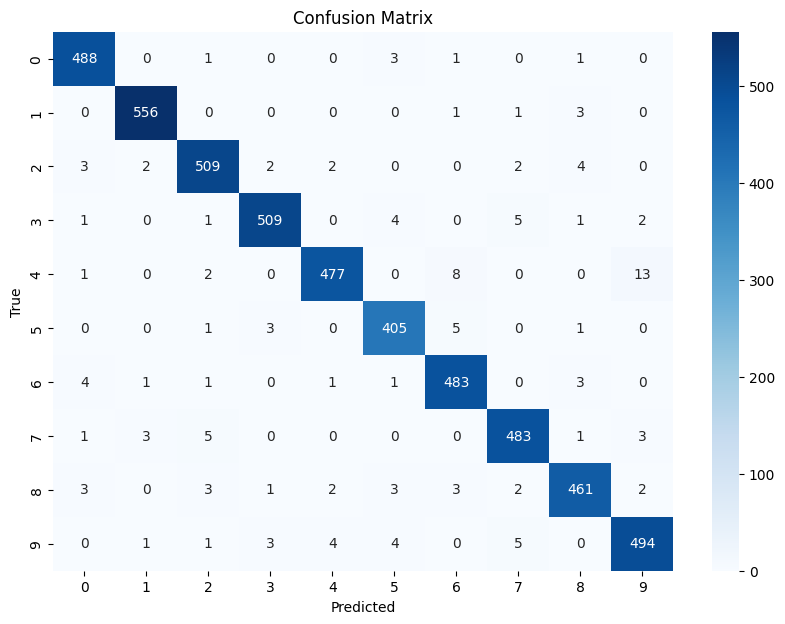

In [21]:
# Generate confusion matrix
plot_conf_matrix(test_labels, predicted_labels)

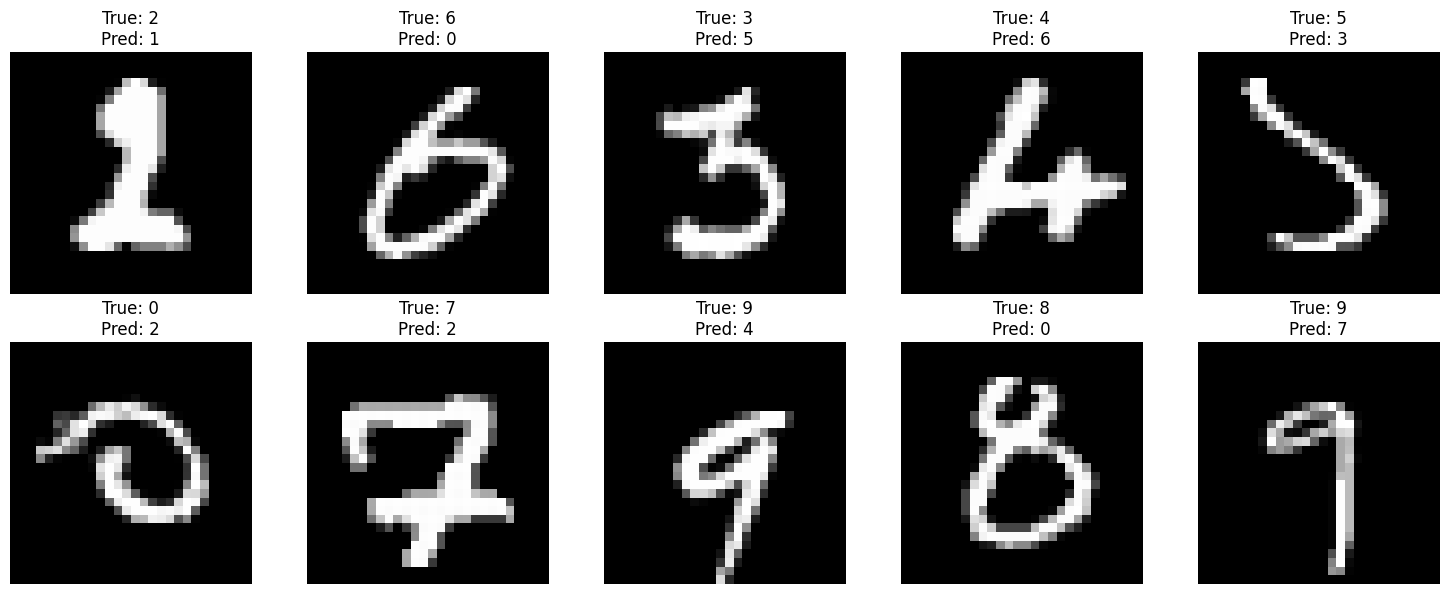

In [22]:
# Visualize some misclassified images

misclassified_indices = (test_labels != predicted_labels)
misclassified_images = test_images[misclassified_indices]
misclassified_true_labels = test_labels[misclassified_indices]
misclassified_predicted_labels = predicted_labels [misclassified_indices]

if len(misclassified_images) > 0:
    plot_samples_with_labels(misclassified_images, misclassified_true_labels, misclassified_predicted_labels, num_samples = 10, randomize= True)
else:
    print("No misclassified images found in the selected batch.")


In [23]:
# Obtener las métricas de precisión y pérdida para entrenamiento y validación
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']


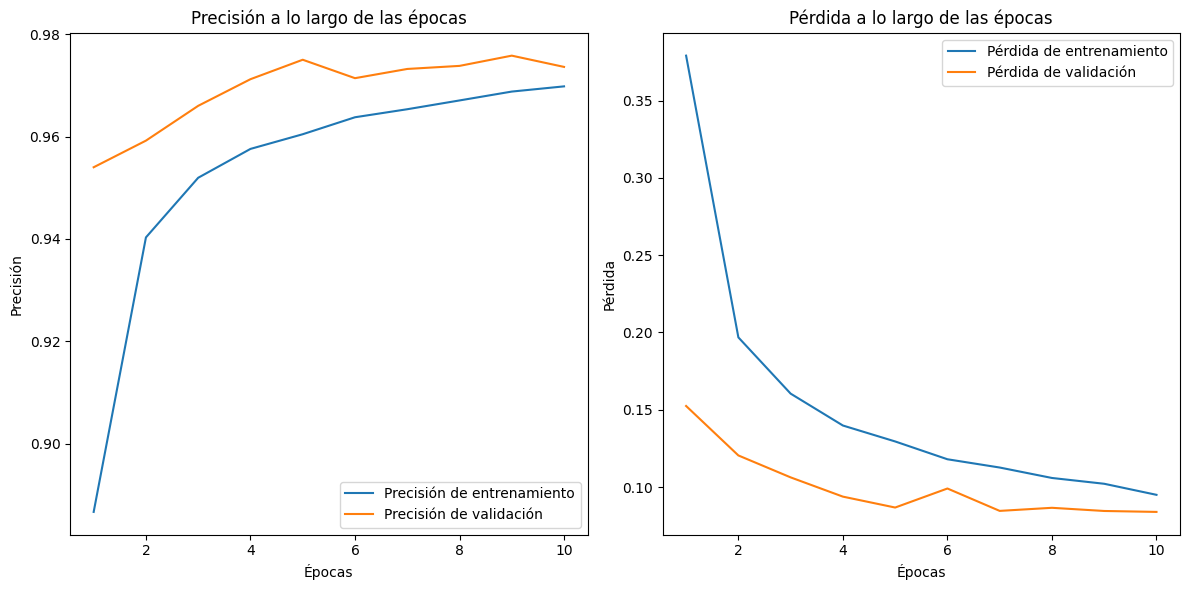

In [24]:
# Graficar precisión y pérdida
epochs = range(1, len(train_accuracy) + 1)

# Precisión
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # Graficar en 1 fila y 2 columnas, en la primera columna
plt.plot(epochs, train_accuracy, label='Precisión de entrenamiento')
plt.plot(epochs, val_accuracy, label='Precisión de validación')
plt.title('Precisión a lo largo de las épocas')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

# Pérdida
plt.subplot(1, 2, 2)  # Graficar en la segunda columna
plt.plot(epochs, train_loss, label='Pérdida de entrenamiento')
plt.plot(epochs, val_loss, label='Pérdida de validación')
plt.title('Pérdida a lo largo de las épocas')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()


In [25]:
print(len(misclassified_images))

135


Qué dificultades encuentra nuestro modelo?

Ideas para solucionarlas?


En el modelo propuesto, se utilizaba el mismo conjunto para entrenamiento y para validación. Como la cantidad de datos no es tan pequeña, dividí el conjunto de prueba de antes en conjunto de prueba y conjunto de validación. La métricas proporcionadas durante la validación son usadas para ver cómo generaliza el modelo ante la presencia de nuevos datos. Al usar el mismo conjunto de entrenamiento no es posible percibir si el modelo está generalizando bien o mal. Además, las métricas val_loss y val accuracy son usadas para ajustar hiperparámetros como el learning rate en la siguiente época. Sin embargo, no se observa ninguna mejora en el modelo.






























